# 1.Import and preprocess the dataset

In [9]:
# Step 1: Import and preprocess the dataset

import pandas as pd

# Import dataset
data = pd.read_csv("Housing.csv")

# Preprocess: Convert categorical variables into dummy/one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Show first 5 rows of preprocessed dataset
print(data_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

# 3.Fit a Linear Regression model using sklearn.linear_model

In [11]:
# Step 3: Fit a Linear Regression model

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully!")


✅ Linear Regression model trained successfully!


# 4.Evaluate model using MAE, MSE, R².

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize model
lin_reg = LinearRegression()

# Fit model on training data
lin_reg.fit(X_train, y_train)

# Get predictions on test data
y_pred = lin_reg.predict(X_test)

print("✅ Linear Regression model fitted successfully!")


✅ Linear Regression model fitted successfully!


In [12]:
# Step 4: Evaluate model using MAE, MSE, R²

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.653


# 5.Plot regression line and interpret coefficients

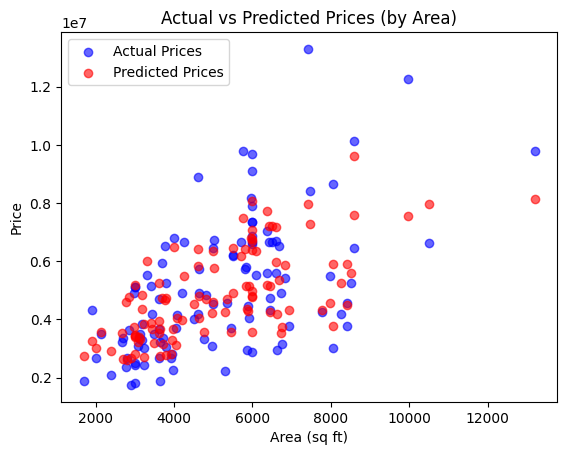


Intercept (b0): 260032.35760741215

Top 10 coefficients:
                Feature   Coefficient
2             bathrooms  1.094445e+06
9   airconditioning_yes  7.914267e+05
8   hotwaterheating_yes  6.846499e+05
10         prefarea_yes  6.298906e+05
3               stories  4.074766e+05
7          basement_yes  3.902512e+05
5          mainroad_yes  3.679199e+05
6         guestroom_yes  2.316100e+05
4               parking  2.248419e+05
1              bedrooms  7.677870e+04


In [13]:
# Step 5: Plot regression line and interpret coefficients

import matplotlib.pyplot as plt
import pandas as pd

# For visualization, take one feature (e.g., 'area') against price
plt.scatter(X_test['area'], y_test, color="blue", alpha=0.6, label="Actual Prices")
plt.scatter(X_test['area'], y_pred, color="red", alpha=0.6, label="Predicted Prices")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (by Area)")
plt.legend()
plt.show()

# Interpret coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nIntercept (b0):", model.intercept_)
print("\nTop 10 coefficients:")
print(coefficients.head(10))
